## Spatial Modeling and Analytics Try-it Notebook #1
### Spatial analysis on elevation data

## Reminder
<a href="#/slide-2-0" class="navigate-right" style="background-color:blue;color:white;padding:8px;margin:2px;font-weight:bold;">Continue with the lesson</a>

<br>
</br>
<font size="+1">

By continuing with this lesson you are granting your permission to take part in this research study for the Hour of Cyberinfrastructure: Developing Cyber Literacy for GIScience project. In this study, you will be learning about cyberinfrastructure and related concepts using a web-based platform that will take approximately one hour per lesson. Participation in this study is voluntary.

Participants in this research must be 18 years or older. If you are under the age of 18 then please exit this webpage or navigate to another website such as the Hour of Code at https://hourofcode.com, which is designed for K-12 students.

If you are not interested in participating please exit the browser or navigate to this website: http://www.umn.edu. Your participation is voluntary and you are free to stop the lesson at any time.

For the full description please navigate to this website: <a href="../../gateway-lesson/gateway/gateway-1.ipynb">Gateway Lesson Research Study Permission</a>.

</font>

Now we'll just work in a notebook without using slides. Just scroll down through the series of code blocks, executing them as you go. Run through this notebook as presented without making any changes, then when you're done, try experimenting with the code by making minor modifications. Enjoy!

Remember for each of the code chunks below, click the arrow to the left of the box. Be patient, sometimes these take a few seconds to execute. Wait for the asterisk to change into a number. 

First of all, as in all Python programs, we have to load the special program libraries we want to use. Noteably, we're going to use some very specialized packages here:

- <a href="https://osmnx.readthedocs.io/en/stable/">OSMNX</a> (imported as "os") - "OSMnx is a Python package that lets you download geospatial data from Open Street Map and model, project, visualize, and analyze real-world street networks and any other geospatial geometries." It's a very large package with lots of spatial analysis tools specially for modeling on networks, but we're just going to use it here to download data from Open Street Map. 

- <a href="http://elevation.bopen.eu/en/stable/">Elevation</a> - Elevation provides "Easy access to global terrain digital elevation models, SRTM 30m DEM and SRTM 90m DEM".

- <a href="https://www.osgeo.org/">OSGEO</a> is a foundation that provides access to a broad set of open source geospatial software. Here we're getting <a href="https://gdal.org/">gdal</a>. 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import elevation
from osgeo import gdal
from matplotlib.pyplot import figure
from mpl_toolkits.axes_grid1 import make_axes_locatable

Now we are going to get a raster of elevation data (called a digital elevation model "DEM") for a specific area defined by a bounding box of lat and long pairs. We're going to start with the area west of Boulder, CO. At <a href="https://boundingbox.klokantech.com">this website</a> we found the four corners of the bounding box for Boulder. 

In [2]:
import warnings
warnings.filterwarnings('ignore') # Hide warnings

#set the output path
dem_path = os.path.join(os.getcwd(), 'supplementary/bd_30m_DEM.tif')

#get the data
bounding = (-105.347541,39.978953,-105.197188,40.063683) 
# elevation.clip(bounds = bounding, output=dem_path)

# If elevation.clip doesn't work uncomment the line below
!eio clip -o supplementary/bd_30m_DEM.tif --bounds -105.347541 39.978953 -105.197188 40.063683

bd_dem = gdal.Open(dem_path)

# Convert gdal.Dataset to numpy ndArray
bd_array = bd_dem.ReadAsArray() 
bd_array

make: Entering directory '/home/jupyter-eshook/.cache/elevation/SRTM1'
curl -s -o spool/N39/N39W106.hgt.gz.temp https://s3.amazonaws.com/elevation-tiles-prod/skadi/N39/N39W106.hgt.gz && mv spool/N39/N39W106.hgt.gz.temp spool/N39/N39W106.hgt.gz
gunzip spool/N39/N39W106.hgt.gz 2>/dev/null || touch spool/N39/N39W106.hgt
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 spool/N39/N39W106.hgt cache/N39/N39W106.tif 2>/dev/null || touch cache/N39/N39W106.tif
curl -s -o spool/N40/N40W106.hgt.gz.temp https://s3.amazonaws.com/elevation-tiles-prod/skadi/N40/N40W106.hgt.gz && mv spool/N40/N40W106.hgt.gz.temp spool/N40/N40W106.hgt.gz
gunzip spool/N40/N40W106.hgt.gz 2>/dev/null || touch spool/N40/N40W106.hgt
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 spool/N40/N40W106.hgt cache/N40/N40W106.tif 2>/dev/null || touch cache/N40/N40W106.tif
rm spool/N40/N40W106.hgt spool/N39/N39W106.hgt
make: Leaving directory '/home/jupyter-eshook/.c

array([[2161, 2158, 2154, ..., 1578, 1577, 1578],
       [2151, 2149, 2145, ..., 1577, 1577, 1577],
       [2140, 2136, 2134, ..., 1577, 1577, 1577],
       ...,
       [2356, 2356, 2363, ..., 1643, 1643, 1644],
       [2368, 2369, 2368, ..., 1644, 1645, 1645],
       [2379, 2372, 2376, ..., 1646, 1646, 1646]], dtype=int16)

Now let's make a plot of this data. We'll use a color ramp designed to visualize terrain.

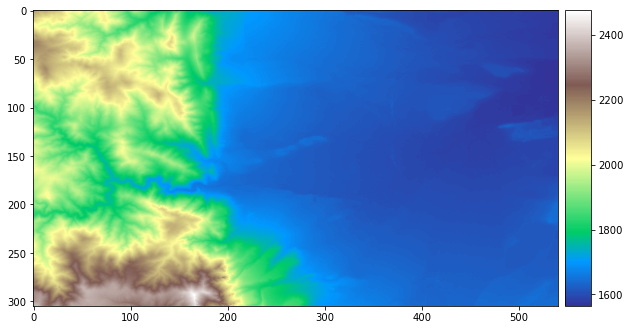

In [3]:
plt.figure(figsize = (10,10))
ax = plt.gca()
im = ax.imshow(bd_array, cmap = 'terrain')
spliter = make_axes_locatable(ax)
cax = spliter.append_axes("right", size = "5%", pad = 0.1) 
plt.colorbar(im, cax=cax)

Since it's elevation, though, we can also make a nice visualization of this elevation data using a hillshade function. 

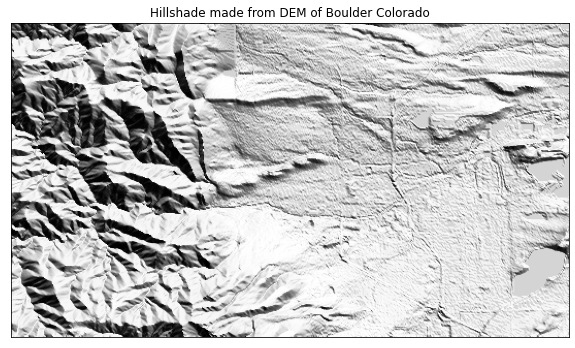

In [7]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

hillshade = es.hillshade(bd_array)

ep.plot_bands(
    hillshade,
    cbar=False,
    title="Hillshade made from DEM of Boulder Colorado",
    figsize=(10, 6),
)
plt.show()


Now we have the data, let's explore it a bit. What's the elevation at the grid point x = 50, y = 60? (origin is in the lower left corner).

In [8]:
x = 50
y = 60
print('Elevation at (x, y) is: ', bd_array[x, y])

Elevation at (x, y) is:  2026


What's the elevation value at the cell at one over and one up? i.e. x+1, y+1?

In [9]:
print('Elevation one cell away is: ', bd_array[x+1, y+1])

Elevation one cell away is:  2047


Now you try - what's the elevation 10 cells over and up, and at 100 cells over and up?

In [10]:
print('Elevation 10 cells away is: ', bd_array[x+10, y+10])
print('Elevation 100 cells away is: ', bd_array[x+100, y+100])

Elevation 10 cells away is:  2099
Elevation 100 cells away is:  1749


Question: does TFL hold here?

Definitely! Elevation is very highly spatially autocorrelated, so nearby cells will be similar, distant cells less so.

Finally we can get a value for spatial autocorrelation by running the function for global Moran's I. We'll get this function out of the module pysal. 

In [12]:
import pysal as ps
import pysal.explore as pse
import pysal.lib as plib

w = plib.weights.lat2W(bd_array.shape[0],bd_array.shape[1], rook=False, id_type="int")
moran = pse.esda.Moran(bd_array, w)

print(f'Measured global Moran\'s I is: {moran.I}') 
print(f'P-value of I under normality assumption is: {moran.p_norm}')

ModuleNotFoundError: No module named 'pysal.cg.shapes'

As we've mentioned, elevation is very highly autocorrelated, so we find a very high Moran's I value (close to the max) and a very low p-value which indicates this is very likely to be correct. 

<font size="+1"><a style="background-color:blue;color:white;padding:12px;margin:10px;font-weight:bold;" 
href="sma-4.ipynb">Click here to go to the next notebook.</a></font>